# **Notebook Overview:**
* Applying data represntions techniques on a 18,000+ women's E-commerce reviews for prAna (2019 - Jan. 2022).


# **Get strating with text preprocessing using NLTK**

In [1]:
import pandas as pd 

from io import StringIO

# Use nltk for valid words
import nltk
import collections as co


import warnings # ignore warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
print('Setup completed!!')

Setup completed!!


# **Discovering of the 10 first rows of the DataFrame🕵**

In [2]:
data = pd.read_csv('../input/daffodil/Wonly.csv', encoding='utf8')
data.head(10)


,Submission Date,Division,Department Name,Class Name,Program Name,Product Name,Overall Rating,Title,Review Text,Fit\nToo Small/Too Large,Age,Body Type,Height,Recommend
0,1/19/2022,Womens,Outdoor Lifestyle,LS Tops,UPF,Sol Protect Hoodie,1,Falling apart after first wash.,I was very excited to receive this item. Howe...,2.0,55.0,Athletic,69.0,0.0
1,1/19/2022,Womens,Yoga/Fitness,Pants,CHKRA,Transform Legging,3,"Great color and fabric, but not full-length",I was really thinking these were going to be m...,1.0,25.0,Athletic,70.0,1.0
2,1/19/2022,Womens,NaN,NaN,NaN,Gram Crop Jean,4,"Cute with good fit, but length is way off",These are cute jeans and fit well (ordered usu...,2.0,45.0,NaN,64.0,0.0
3,1/19/2022,Womens,Yoga/Fitness,LS Tops,SNRS,Sunrise Hoodie,5,This sweatshirt is very soft and comfortable,I was able to try this on in the store and siz...,2.0,35.0,Curvy,66.0,1.0
4,1/19/2022,Womens,Outdoor Lifestyle,Pants,SZ,Halle Straight,5,Comfy fit,I absolutely love these pants! The fit is perf...,2.0,45.0,Slender,71.0,1.0
5,1/19/2022,Womens,Outdoor Lifestyle,Sweaters,SWT,Nemma Sweater,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN
6,1/18/2022,Womens,Outdoor Lifestyle,Sweaters,SWT,Nemma Sweater,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,1/18/2022,Womens,Outdoor Lifestyle,Pants,SZ,Halle Straight,5,Hike with PrAna,This is my third pair of the Halle style. The...,2.0,55.0,Slender,71.0,1.0
8,1/18/2022,Womens,Outerwear,Jackets,UDWN,Banajaara Jacket,5,Amazing Jacket,"I never write reviews, but I have been so smit...",2.0,25.0,Petite,63.0,1.0
9,1/18/2022,Womens,Outdoor Lifestyle,Pants,CLMBB,Wakeen Pant,4,NaN,I actually really love these pants. Large pock...,3.0,35.0,Athletic,67.0,1.0


This shows what our data looks like - we will be looking at the Divsion (Gender), Department, Product Type (Class), Fabric Program (Program Name, abbrv.), Overall Rating (1-5 stars), Fit (1-3), Age Range (abbrv.) Body Type, Height (in.) and Recommend (1=yes, 0 = no)

# **Check the Features(columns)types (int, float , obj or bool)**

In [3]:
data.dtypes

Submission Date              object
Division                     object
Department Name              object
Class Name                   object
Program Name                 object
Product Name                 object
Overall Rating                int64
Title                        object
Review Text                  object
Fit\nToo Small/Too Large    float64
Age                         float64
Body Type                    object
Height                      float64
Recommend                   float64
dtype: object

# **Rename the columns names for Python legibility🐍**

In [4]:
#renaming Fit: Too Small or Too Large as "Fit"
data.rename(columns={'Fit\nToo Small/Too Large': 'Fit'},inplace=True)

data.rename(columns={'Class Name': 'Class'},inplace=True)

data.rename(columns={'Overall Rating': 'Rating'},inplace=True)

# **Our New Cloumns Names**

In [5]:
#checking  column names
print(data.columns)

Index(['Submission Date', 'Division', 'Department Name', 'Class',
       'Program Name', 'Product Name', 'Rating', 'Title', 'Review Text', 'Fit',
       'Age', 'Body Type', 'Height', 'Recommend'],
      dtype='object')


In [6]:
data


,Submission Date,Division,Department Name,Class,Program Name,Product Name,Rating,Title,Review Text,Fit,Age,Body Type,Height,Recommend
0,1/19/2022,Womens,Outdoor Lifestyle,LS Tops,UPF,Sol Protect Hoodie,1,Falling apart after first wash.,I was very excited to receive this item. Howe...,2.0,55.0,Athletic,69.0,0.0
1,1/19/2022,Womens,Yoga/Fitness,Pants,CHKRA,Transform Legging,3,"Great color and fabric, but not full-length",I was really thinking these were going to be m...,1.0,25.0,Athletic,70.0,1.0
2,1/19/2022,Womens,NaN,NaN,NaN,Gram Crop Jean,4,"Cute with good fit, but length is way off",These are cute jeans and fit well (ordered usu...,2.0,45.0,NaN,64.0,0.0
3,1/19/2022,Womens,Yoga/Fitness,LS Tops,SNRS,Sunrise Hoodie,5,This sweatshirt is very soft and comfortable,I was able to try this on in the store and siz...,2.0,35.0,Curvy,66.0,1.0
4,1/19/2022,Womens,Outdoor Lifestyle,Pants,SZ,Halle Straight,5,Comfy fit,I absolutely love these pants! The fit is perf...,2.0,45.0,Slender,71.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18155,5/29/2019,Womens,Yoga/Fitness,Pants,CHKRA,Transform Legging,5,Love the support and rise,I love a great pair of high waisted leggings. ...,NaN,NaN,NaN,NaN,NaN
18156,5/29/2019,Womens,Yoga/Fitness,Pants,CHKRA,Pillar Legging,5,NaN,I LOVE these leggings! Finally broke down and ...,NaN,NaN,NaN,NaN,NaN
18157,5/29/2019,Womens,NaN,NaN,NaN,Pillar Capri,5,Perfect capri,"Nice fit I'm 5'5"" and 125# medium was very com...",NaN,NaN,NaN,NaN,NaN
18158,5/29/2019,Womens,NaN,NaN,NaN,Pillar Capri,3,Comfortable but Slips,These tights are so comfortable until you star...,NaN,NaN,NaN,NaN,NaN


# **Look into the missing vlaues at each column index🔍👀**

In [7]:
data.isnull().sum()

Submission Date        0
Division               0
Department Name     3325
Class               3325
Program Name        5968
Product Name           0
Rating                 0
Title               3286
Review Text         3053
Fit                 8123
Age                 8228
Body Type           8085
Height             17900
Recommend           8263
dtype: int64

Every review has a submission date and Overall Rating, however ~99% of reviews do not contain Height, ~44% of reviews do not contain Fit, Age Group, Body Type, or Recommend to a Friend. 

# **Graphical Discription of the Data:**

# **This histgram below represent that the 👩35-44 age range are the main customers of the Site.**

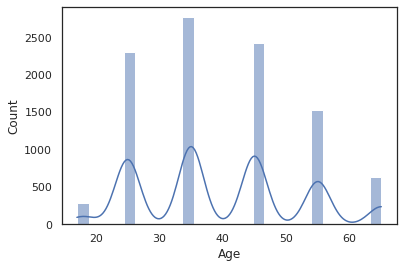

In [8]:
sns.histplot(data=data, x='Age', kde=True)
plt.show()

17 = 17 and under  <br>
18 = 18 to 24<br> 
25 = 25 to 34<br>
35 = 35 to 44<br>
45 = 45 to 54<br>
55 = 55 to 64<br>
65 = 65+


This suggests our age demographic is 35-44, 45-50 year olds

# **The majority of site visitors are more likely to give 5 rates for each product**

<AxesSubplot:xlabel='Rating', ylabel='Count'>

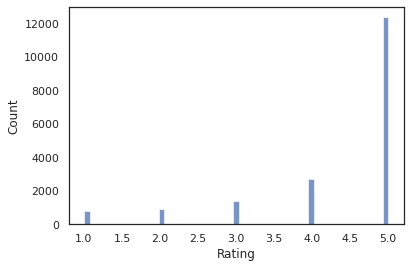

In [9]:
sns.histplot(data=data, x='Rating', kde=False)

Overall, prAna customer reviews are overwhelmingly positive for DG 

# **The majority of site visitors are more likely to give a score of 2 for Fit**

<AxesSubplot:xlabel='Fit', ylabel='Count'>

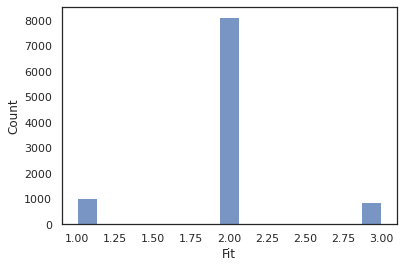

In [10]:
sns.histplot(data=data, x='Fit', kde=False)

1 = Too Small <br>
2 = Just Right <Br>
3 = Too Big

# **The Majority of Reviews are by Athletic Body Types 🚴**

<AxesSubplot:xlabel='Body Type', ylabel='Count'>

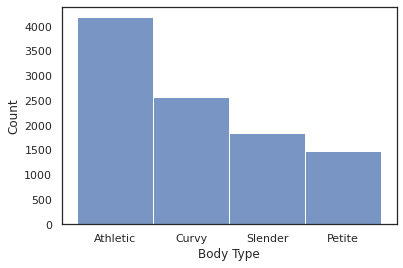

In [11]:
sns.histplot(data=data, x='Body Type', kde=False,)

The majority of DG reviews are by Athletic Body Types, implying our customer demographic is also this body type


# **This graph shows a comparison off the overall rating of each Product Class Name**

<AxesSubplot:xlabel='Rating', ylabel='Class'>

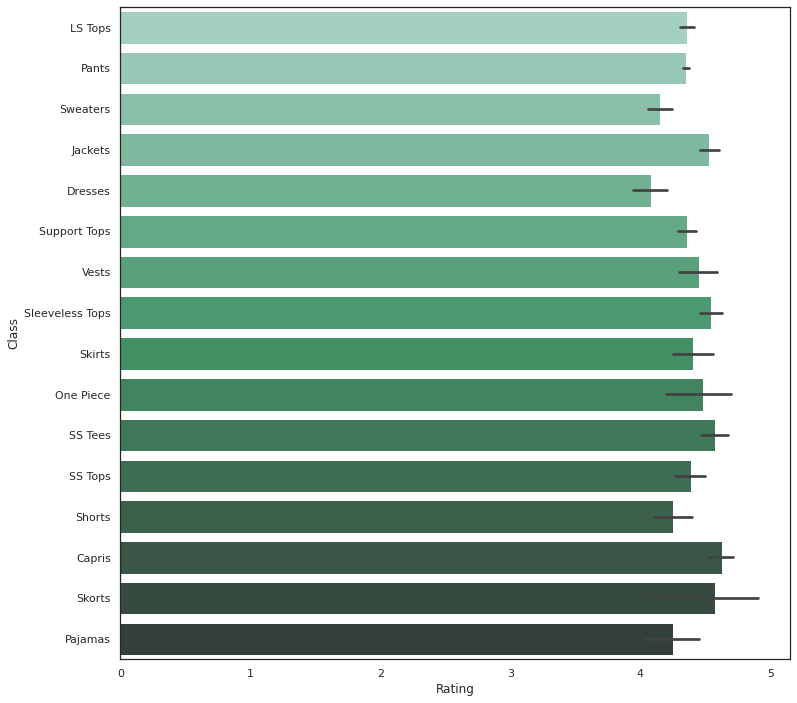

In [12]:
#data.rename(columns={'Class Name':'ClassName'}, inplace=True)

sns.set(rc={'figure.figsize':(12,12)})
sns.set_style('white')
sns.barplot(x=data['Rating'], y=data['Class'] ,palette="BuGn_d")

           

My computer was not "powerful" enough to list these graphs in ascending 😂 BUT this graph shows that Jackets, Skorts, short sleeve and sleeveless Tops, and Capris are our highest rated products

# **Pajamas and Vests are more preferable for those whom are above 40's where Support Tops and Shorts attracts womens in their 20's as this barplot shows below**

<AxesSubplot:xlabel='Age', ylabel='Class'>

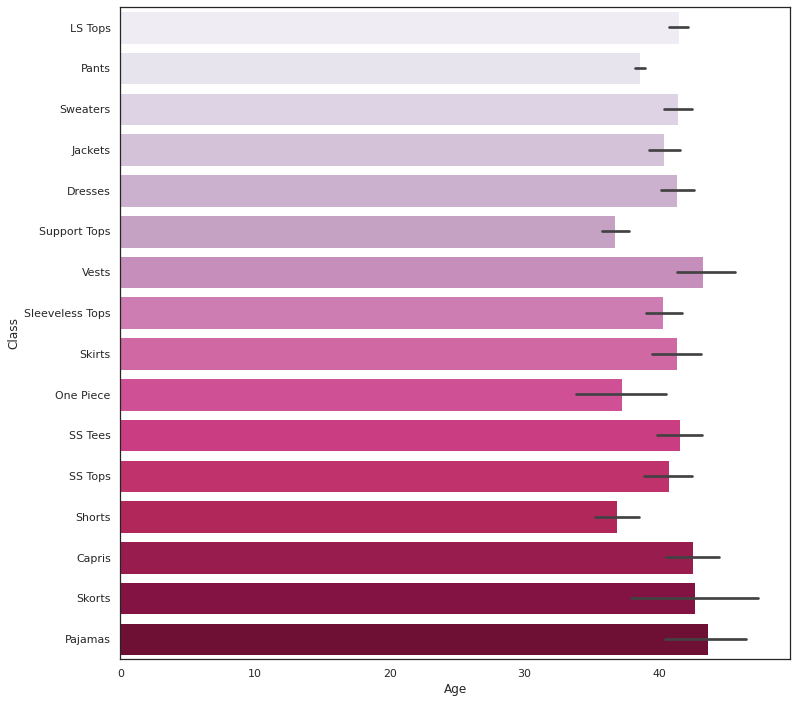

In [13]:
sns.set(rc={'figure.figsize':(12,12)})
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=False)
sns.barplot(x=data['Age'], y=data['Class'],palette="PuRd")

Our younger demographic tends to review Active accessories the most (Yoga, Climbing, Headwear) suggesting our younger demographic is more interested in outdoor activities.

#  **Our Younger Demographic tends to have Athletic and Curvy Body Types** 

<AxesSubplot:xlabel='Body Type', ylabel='Age'>

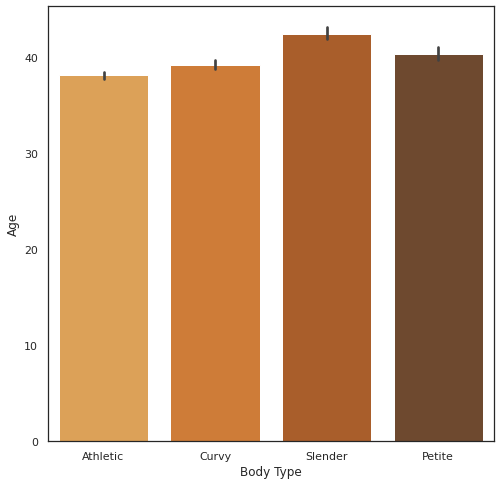

In [14]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=False)
sns.barplot(x=data['Body Type'], y=data['Age'],palette="YlOrBr_d")

Curvy and Atheltic are the most common body types for our younger shoppers, while older shoppers tend to be Slender and Petite. 

# **Dressed and Sweaters trend to fit "Too Big" while Shorts and Pants trend to fit "Too Small"**

<AxesSubplot:xlabel='Fit', ylabel='Class'>

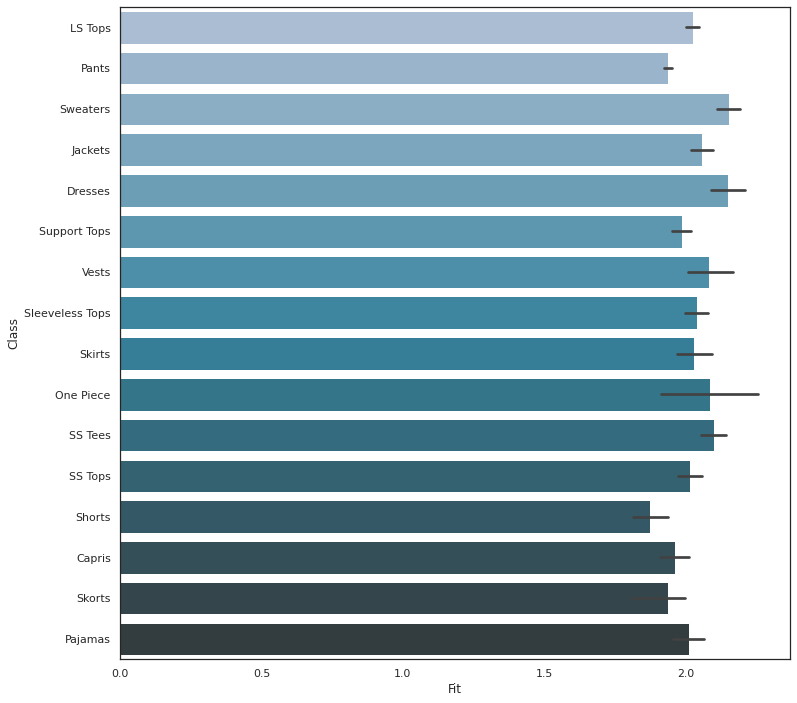

In [15]:
sns.set(rc={'figure.figsize':(12,12)})
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=False)
sns.barplot(x=data['Fit'], y=data['Class'],palette="PuBuGn_d")

Sweaters and Dresses tend to fit too large however Bottoms and Support Tops tends to run too small for our women customers. 

# **Curvy Body Type has the Lowest Fit Score**

<AxesSubplot:xlabel='Fit', ylabel='Body Type'>

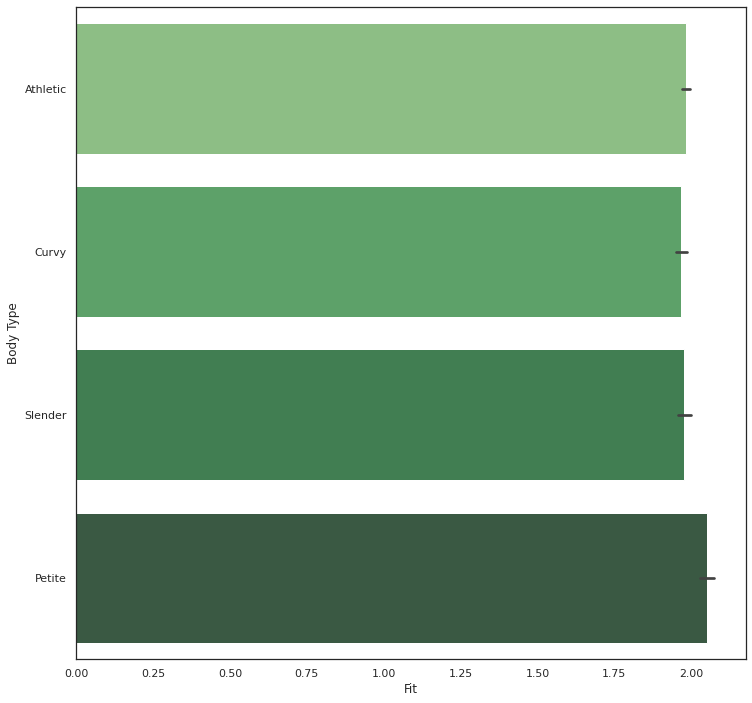

In [16]:
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=False)
sns.barplot(x=data['Fit'], y=data['Body Type'],palette="YlGn_d")

Our Curvy body type customers leave the lowest fit score, indicating that our clothes tend to run small for them. 

# **Atheletic Body Type Leaves the Highest Reviews**

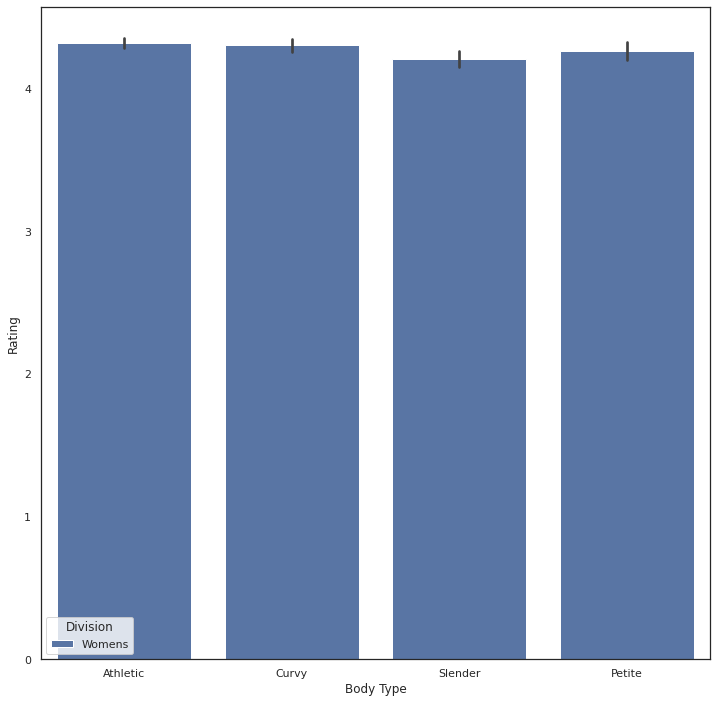

In [17]:
ax = sns.barplot(x="Body Type", y="Rating", hue="Division", data=data)

This plot shows the mean overall rating per division, per body type. Our Athletic shoppers appear to be the "most satisfied" with our Women's Products.

# **Plots shows the ditribution of positive ratings across Department Name, Age, Body Type**


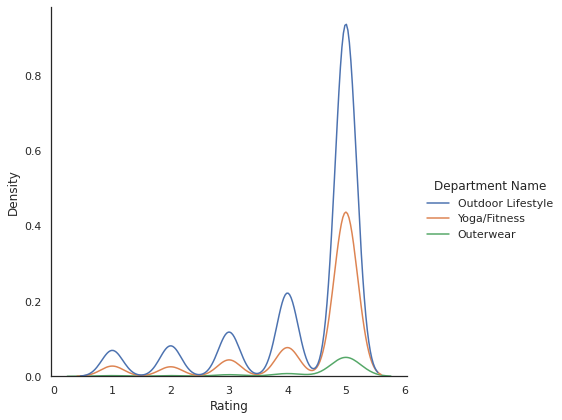

In [18]:
sns.displot(data=data,
           x='Rating', hue="Department Name",
    kind="kde", height=6,
    #multiple="fill", clip=(0, None),
)

Outdoor lifestyle is our *most* rated department.

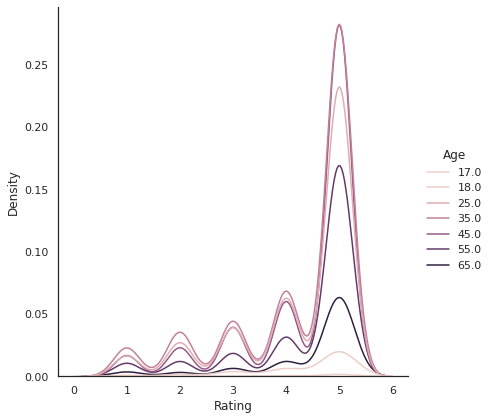

In [19]:
sns.displot(data=data,
           x='Rating', hue="Age",
    kind="kde", height=6,
    #multiple="fill", clip=(0, None),
)

Age ranges 35-44, 45-54, 55- 65 leave the most reviews, while customers under 24 years old leave the least amounhis suggests our women age demographic is 35-64. 

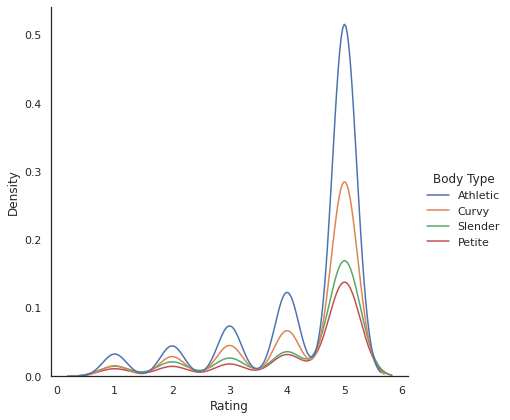

In [20]:
sns.displot(data=data,
           x='Rating', hue="Body Type",
    kind="kde", height=6,
    #multiple="fill", clip=(0, None),
)

This graph shows that majority of our reviews come from Athletic and Curvy Body Types.

# **Plot shows the ditribution of positive ratings across Program Name**

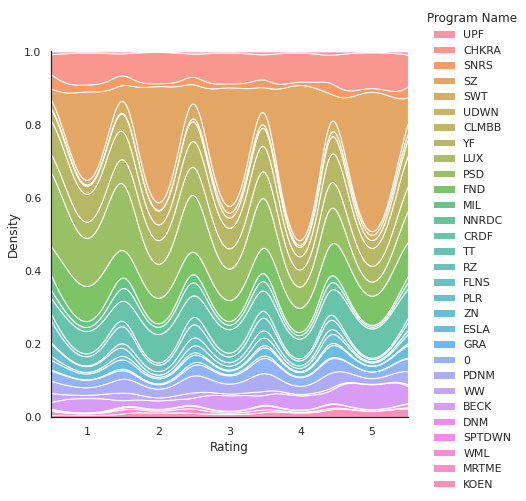

In [21]:
sns.displot(data=data,
           x='Rating', hue="Program Name",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
)

ALTITUDE = ALT <br>
BECKSA = BECK <br>
CARDIFF = CRDF <br>
CHAKABA = CHKRA <br>
CHALK BAGS = CHLK <br>
CLIMB BOTTOMS = CLMBB <br>
COLD WEATHER ACCESSOR = CWA<br>
DENIM = DNM <br>
ESLA = ELSA <br>
FLANNELS = FLNLS <br>
FOUNDATION = FND <br>
GRAPHIC = GRA <br>
HEADWEAR = HDWR <br>
JOURNEYMAN = JM <br>
KOEN = KOEN <br>
LIFESTYLE - MARITIME = MRTME<br>
LIFESTYLE - NEW NORDIC = NNRDC <br>
LUNARA = LUX <br>
MILAN = MIL<br>
PERFORMANCE STRETCH DENIM = PSD <br>
POLAR ESCAPE = PLRE <br>
PRANA BASICS = BSX <br>
PREMIUM DENIM = PDNM <br>
PPOSPECT HEIGHTS = PSPCT <br>
REZION = RZ <br>
SHIRTING = SHRTNG <br>
SPORTY DOWN = SD <br>
STRETCH ZION = SZ <br>
SUNRISE = SNRS <br>
SWEATERS = SWT <br>
TRI-THERMAL = TT <br>
UPF = UPF <br>
URBAN DOWN = UDWN <br>
VAHA = VHA <br>
WOOL MID-LAYER = WML <br>
WORKWEAR = WW <br>
YOGA/FITNESS = Y/F <br>
ZAWN = ZN <br>


    

This very pretty graph shows a high level distribution of fabric program reviews. Stretch Zion is by far our most reviewed fabric program, follwed by Chakra for women.


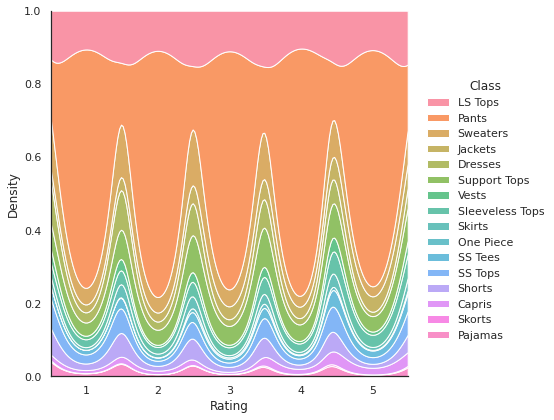

In [22]:
sns.displot(data=data,
           x='Rating', hue="Class",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
)

This very pretty graph shows a high level distribution of product type reviews. Pants by far our most reviewed fabric program, followed by Long Sleeve Tops.


# **This boxplot below determine the mean age according to each department and style program**

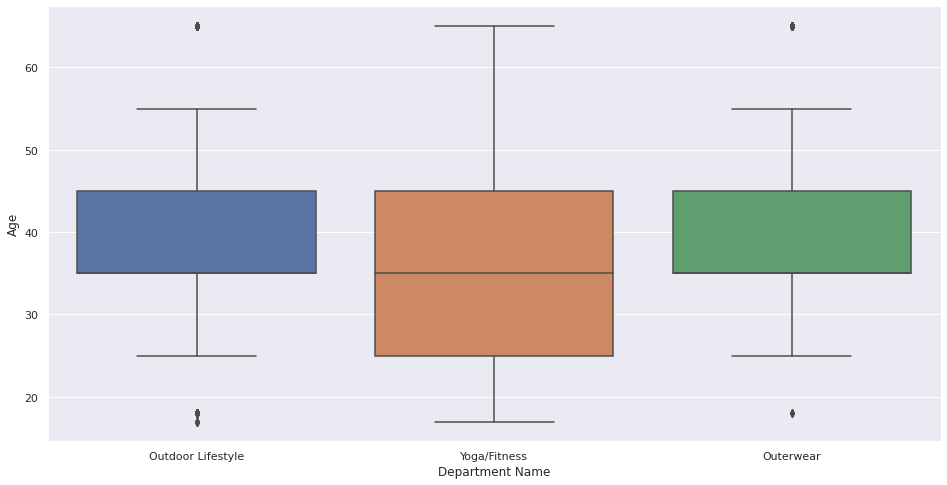

In [23]:
sns.set(rc={'figure.figsize':(16,8)})
sns.boxplot(x=data['Department Name'], y=data['Age'])
plt.show()

The plot shows that our Yoga/Fitness selection attracts a younger age demographic.

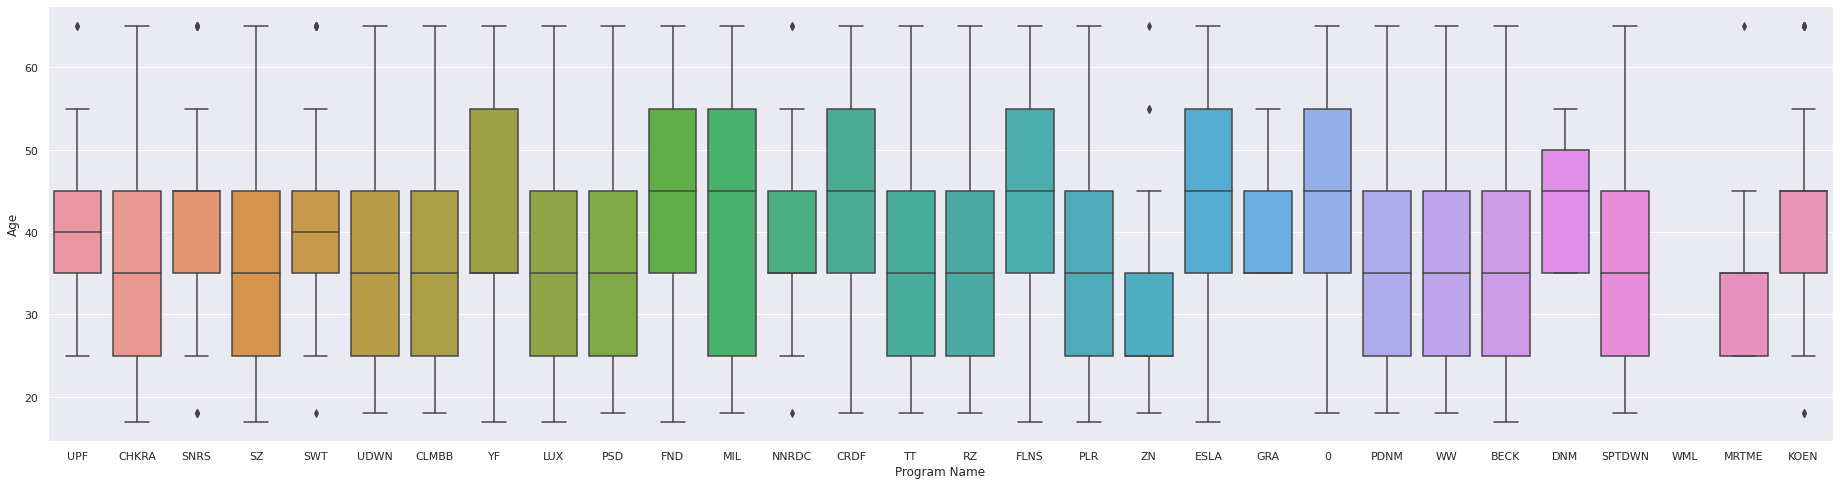

In [24]:


sns.set(rc={'figure.figsize':(32,8)})
sns.boxplot(x=data['Program Name'], y=data['Age'])
plt.show()

Age Distribution by Fabric Type, reiterates that younger demographic are more interested in Activewear/Yoga while older demographics lean towards Lifestyle fabrics

ALTITUDE = ALT <br>
BECKSA = BECK <br>
CARDIFF = CRDF <br>
CHAKABA = CHKRA <br>
CHALK BAGS = CHLK <br>
CLIMB BOTTOMS = CLMBB <br>
COLD WEATHER ACCESSOR = CWA<br>
DENIM = DNM <br>
ESLA = ELSA <br>
FLANNELS = FLNLS <br>
FOUNDATION = FND <br>
GRAPHIC = GRA <br>
HEADWEAR = HDWR <br>
JOURNEYMAN = JM <br>
KOEN = KOEN <br>
LIFESTYLE - MARITIME = MRTME<br>
LIFESTYLE - NEW NORDIC = NNRDC <br>
LUNARA = LUX <br>
MILAN = MIL<br>
PERFORMANCE STRETCH DENIM = PSD <br>
POLAR ESCAPE = PLRE <br>
PRANA BASICS = BSX <br>
PREMIUM DENIM = PDNM <br>
PPOSPECT HEIGHTS = PSPCT <br>
REZION = RZ <br>
SHIRTING = SHRTNG <br>
SPORTY DOWN = SD <br>
STRETCH ZION = SZ <br>
SUNRISE = SNRS <br>
SWEATERS = SWT <br>
TRI-THERMAL = TT <br>
UPF = UPF <br>
URBAN DOWN = UDWN <br>
VAHA = VHA <br>
WOOL MID-LAYER = WML <br>
WORKWEAR = WW <br>
YOGA/FITNESS = Y/F <br>
ZAWN = ZN <br>

# **Nearly 75% of Reviews are Left by Women over 25 years old**

<AxesSubplot:ylabel='Rating'>

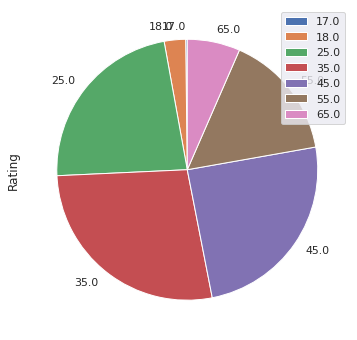

In [25]:
data.groupby(['Age']).sum().plot(kind='pie', subplots=False, shadow = False,startangle=90,figsize=(6,6), y='Rating')


# **What Products are Highly Recommended?🌟**

<AxesSubplot:xlabel='count', ylabel='Class'>

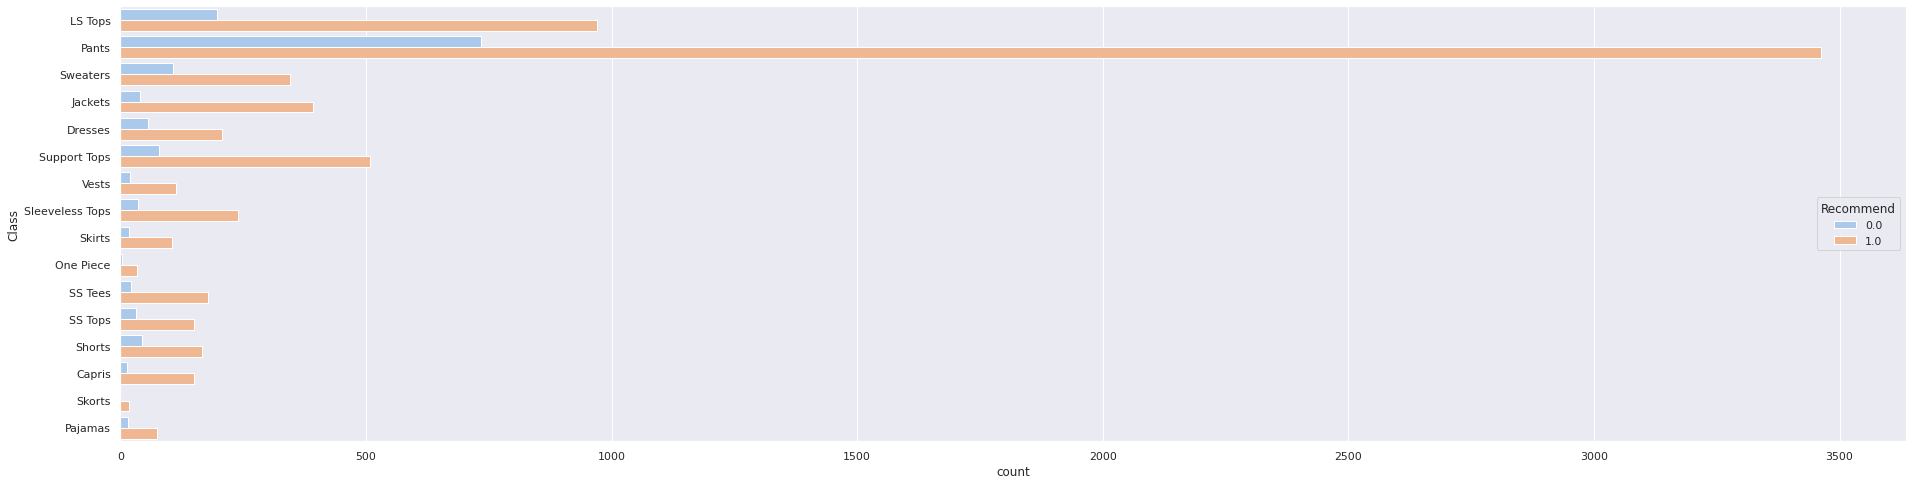

In [26]:
sns.countplot(data=data, y='Class', hue='Recommend',  palette = "pastel")

This graph shows the difference between "Yes I would recommend to a friend" compared to amount of "NO I would not recommend" responses based on Product Types

<AxesSubplot:xlabel='count', ylabel='Department Name'>

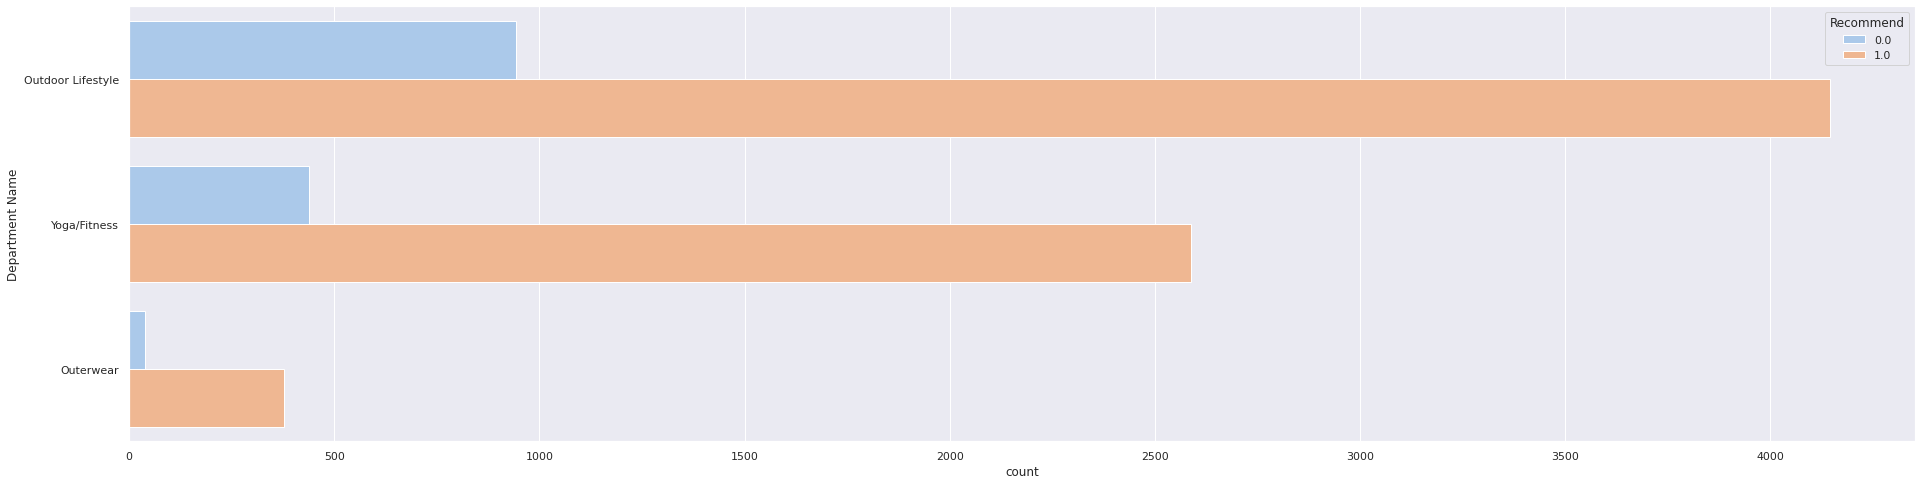

In [27]:
sns.countplot(data=data, y='Department Name', hue='Recommend' ,palette = "pastel")

This graph shows the difference between "Yes I would recommend to a friend" compared to amount of "NO I would not recommend" responses based on Department Types


<AxesSubplot:xlabel='count', ylabel='Age'>

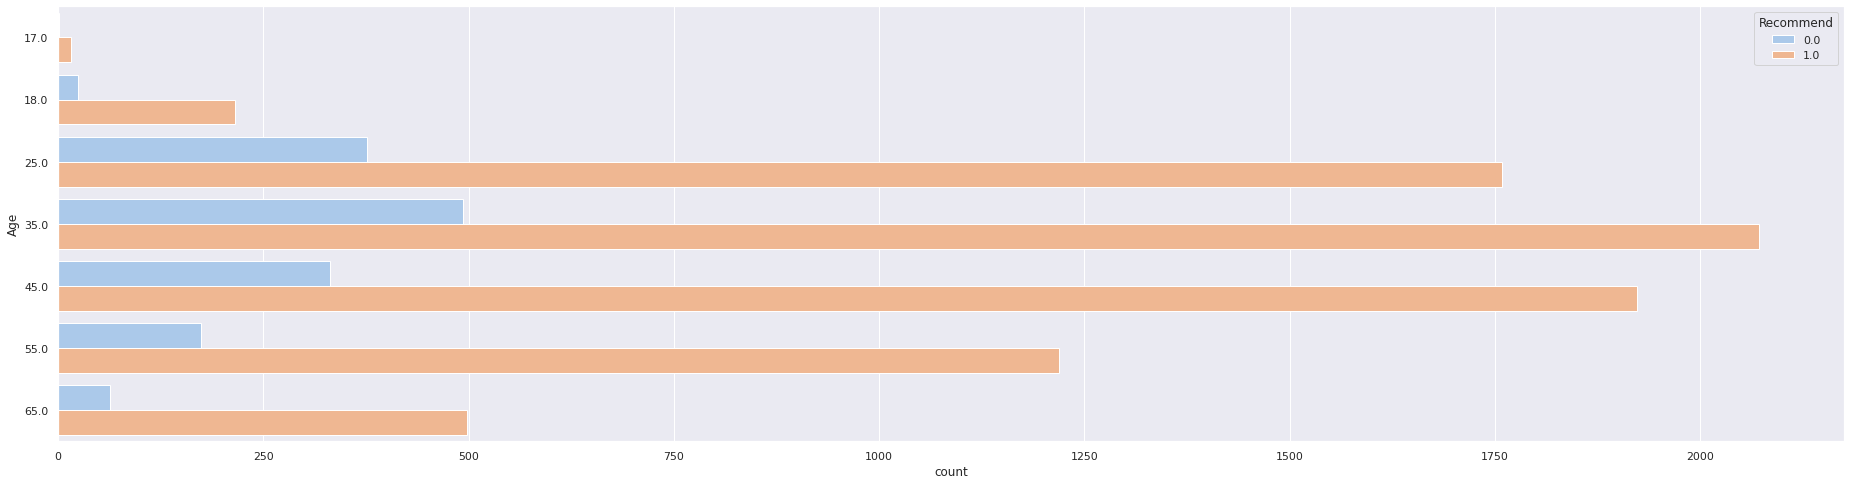

In [28]:
sns.countplot(data=data, y='Age', hue='Recommend', palette = "pastel")

This graph shows the difference between "Yes I would recommend to a friend" compared to amount of "NO I would not recommend" responses per Age Range. Women ages 35-44 are *most* likely to recommend our products to a friend. Women ages 25-34 are *least* likely to recommend our products to a friend.


# **☁️Word Cloud☁️**

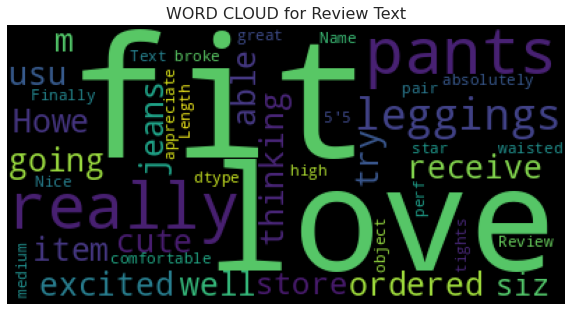

In [29]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

plt.figure(figsize = (10,10))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords = stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(data['Review Text']))

#Plotting the word cloud
plt.imshow(wordcloud)
plt.title("WORD CLOUD for Review Text", fontsize = 16)
plt.axis('off')
plt.show()

"Love" and "Fit" were the most used words across all of our reviews. Pants and Leggins are the product types mentioned the most in our women's reviews.